In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt 

In [2]:
eeg = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/emotions.csv')
eeg.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
# Number of samlpes in each class

eeg['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [4]:
# defining the input and output columns to separate the dataset in the later cells.

input_columns = list(eeg.columns[:-1])
output_columns = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']    # column names to be used after one-hot encoding

print("Number of input columns: ", len(input_columns))
#print("Input columns: ", ', '.join(input_columns))

print("Number of output columns: ", len(output_columns))
#print("Output columns: ", ', '.join(output_columns))

Number of input columns:  2548
Number of output columns:  3


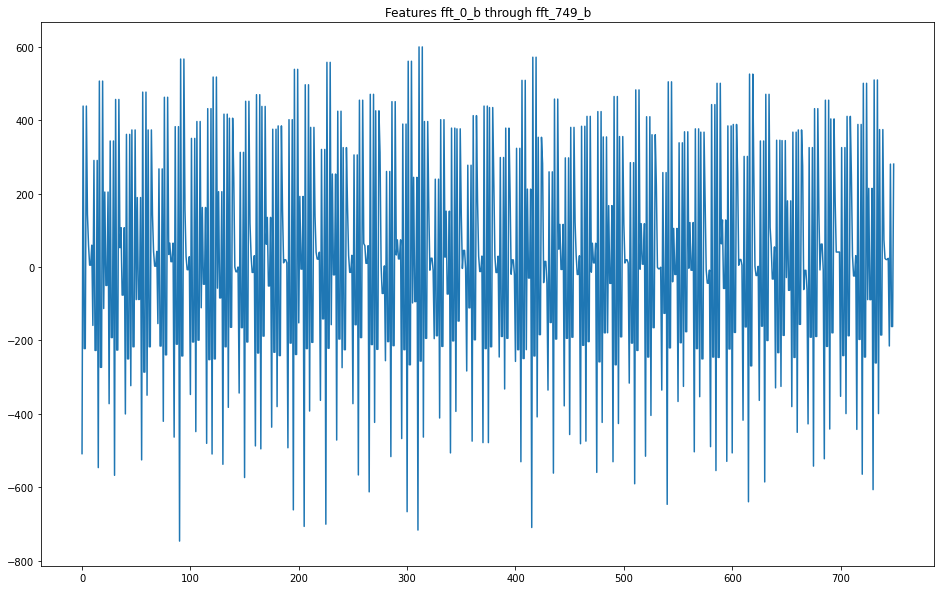

In [5]:
sample = eeg.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [6]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}


### Preprocessing

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(eeg) 

In [9]:
X_train.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.5,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.04,...,-50.0,150.0,-150.0,-150.0,150.0,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.4,27.1,3.27000,1.1200,6.480,2.300,5.66,...,74.2,-76.0,-10.9,-10.9,-76.0,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.9,27.9,-1.44000,-4.2000,-8.310,-4.340,4.04,...,-803.0,619.0,-331.0,-331.0,619.0,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.3,24.6,-0.00524,-0.0699,1.680,0.266,-4.47,...,167.0,-24.4,-18.1,-18.1,-24.4,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.8,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.39,...,130.0,-25.7,4.1,4.1,-25.7,131.0,-21.70,19.60,19.60,-21.70


## Visualization 

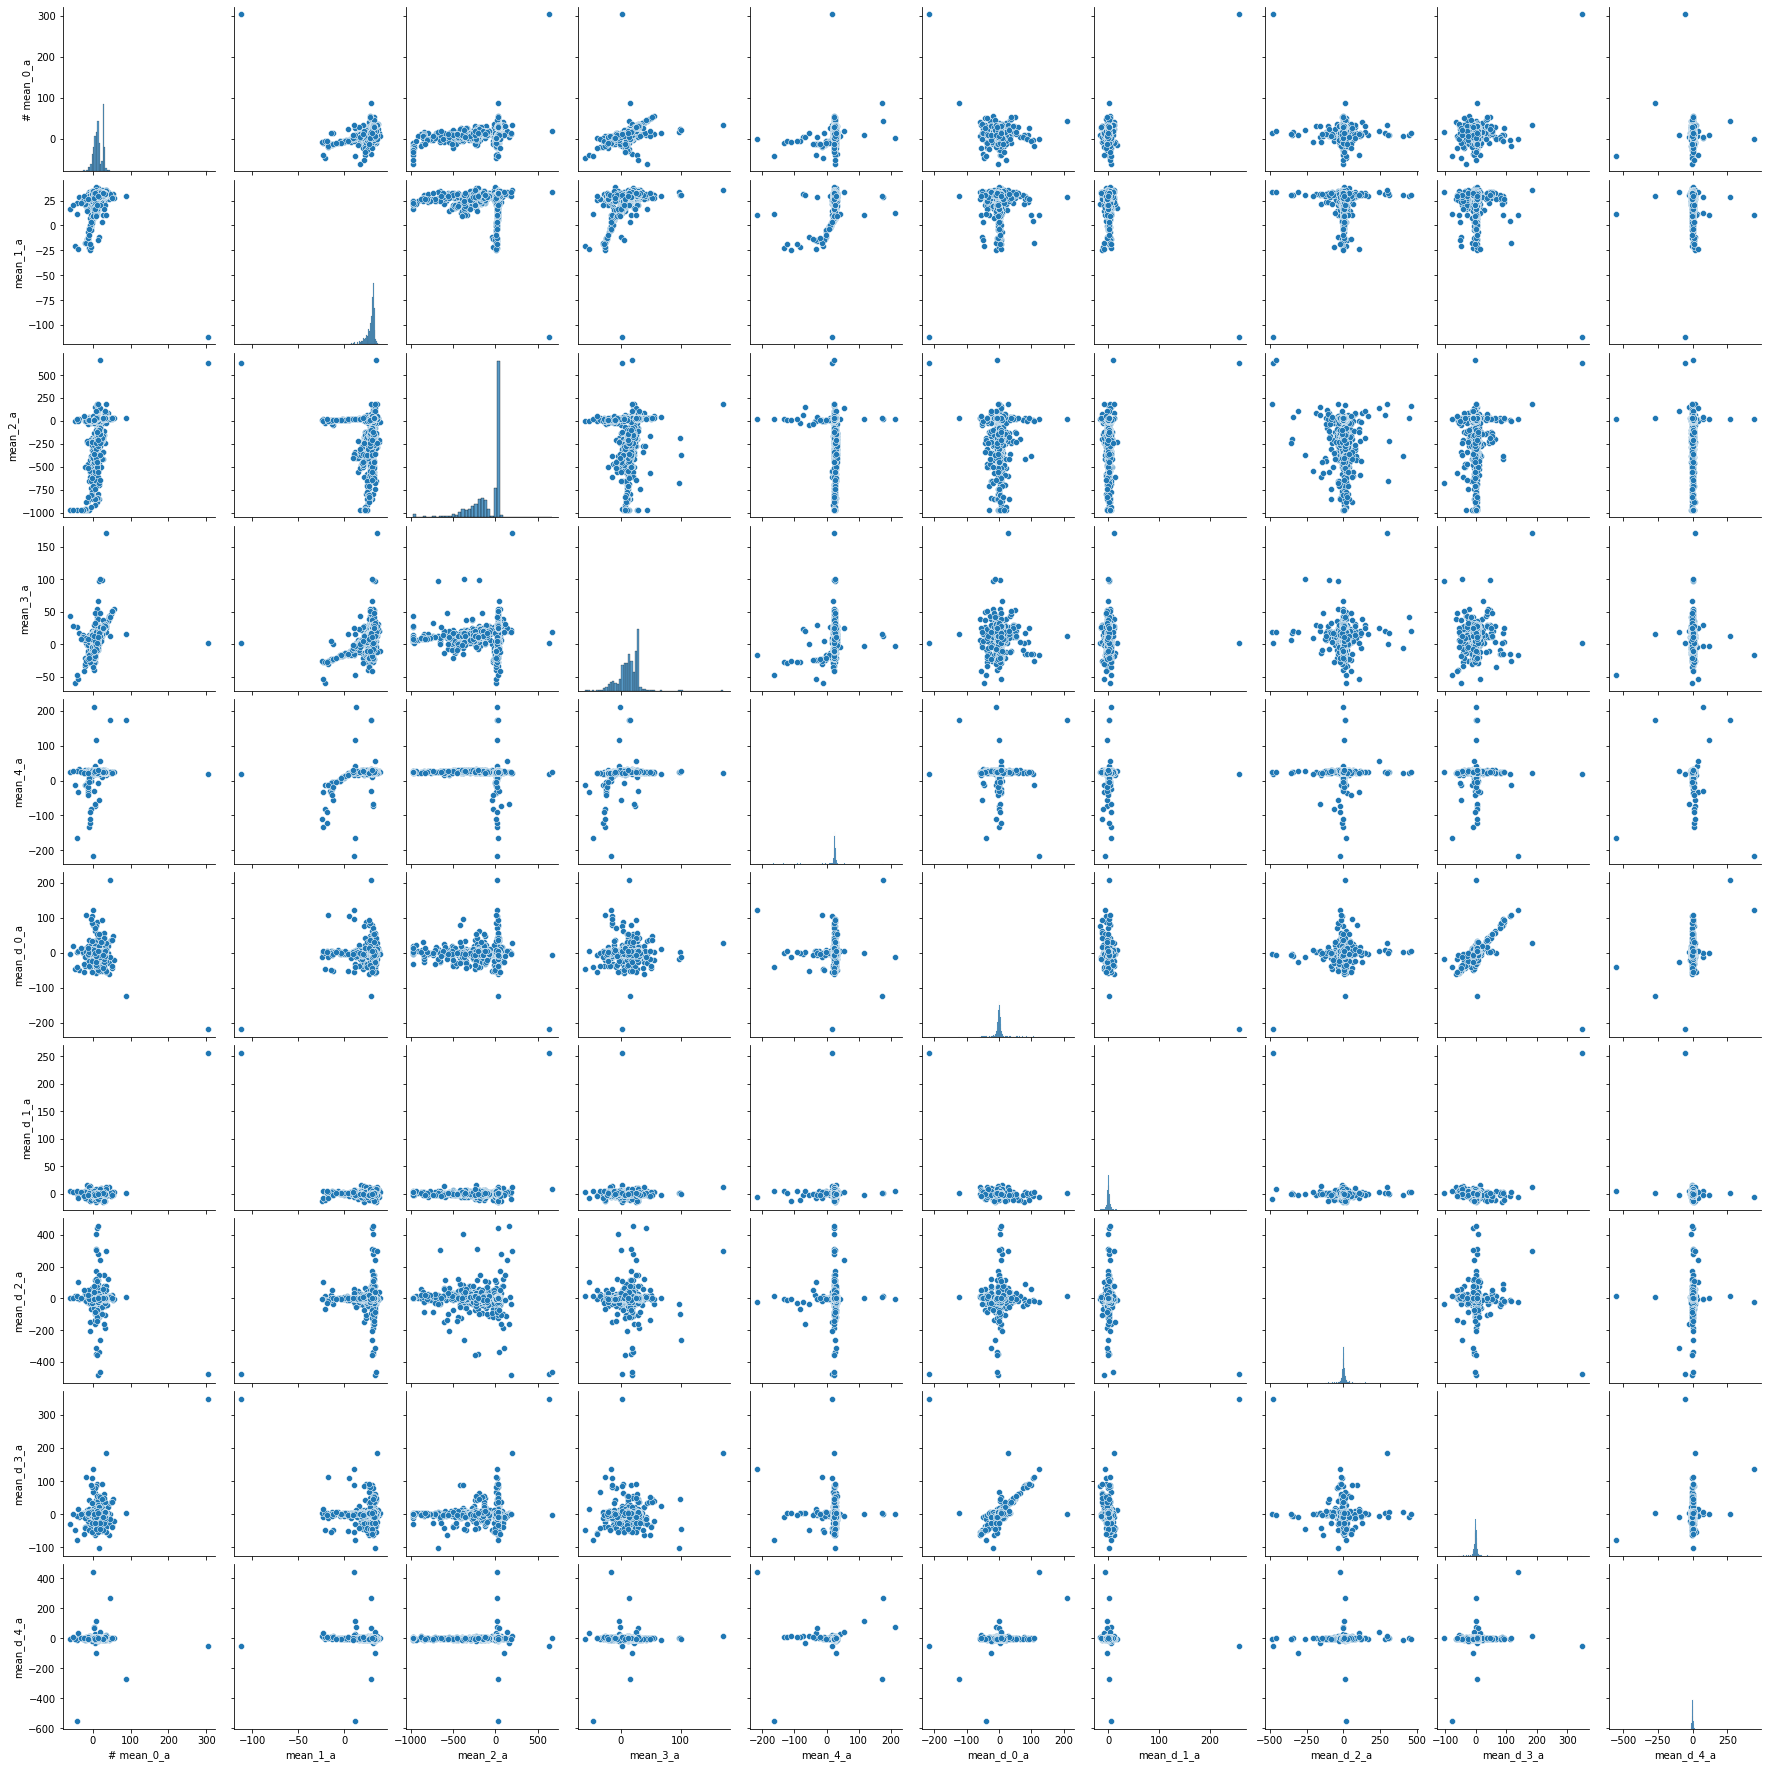

In [10]:
import seaborn as sns 
sns.pairplot(X_train.iloc[:, 0:10])

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

labels = eeg['label']
eeg['Label_cat'] = le.fit_transform(labels) 

for cl in le.classes_: 
    print(cl, le.transform([cl])[0]) 

NEGATIVE 0
NEUTRAL 1
POSITIVE 2


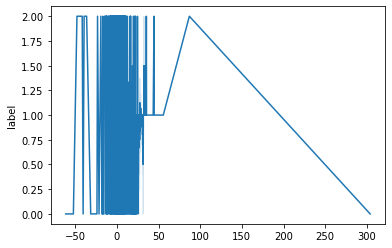

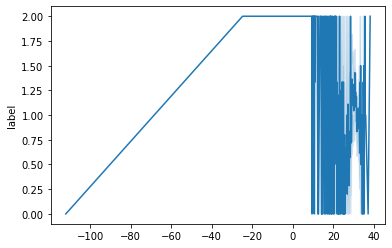

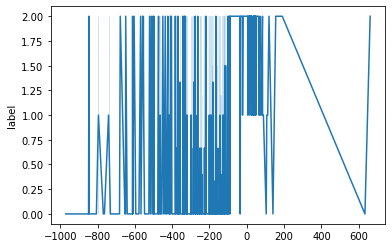

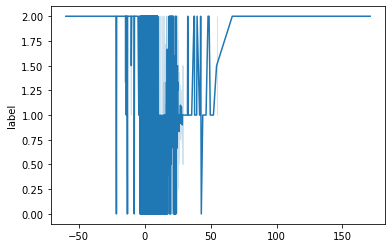

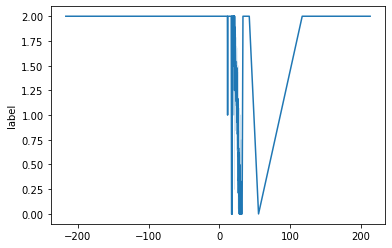

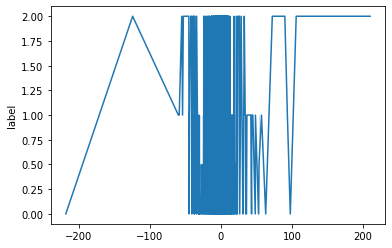

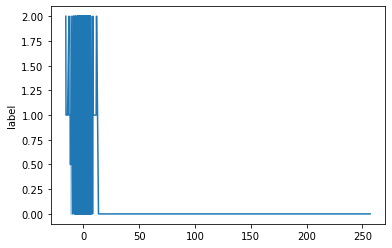

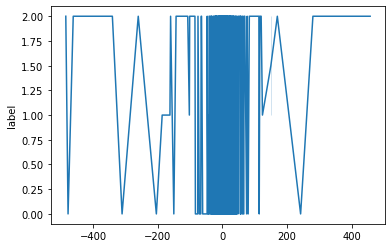

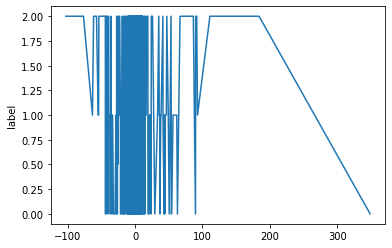

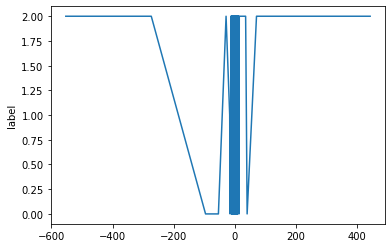

In [12]:
for i,col in enumerate(X_train.columns): 
    if i==10: 
        break
    
    graph_x = X_train[col].values 
    graph_y = y_train 
    plt.figure(i)

    sns.lineplot(x = graph_x, y = graph_y)

## Scaling all columns

In [13]:
# def scale_cols(df):
#     min_max_scaler = MinMaxScaler() 
#     df[df.columns] = min_max_scaler.fit_transform(df[df.columns]) 

In [15]:
# scale_cols(X_train)
# # X_train.head() 

### Modelling


In [16]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=50,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
24/24 [==============================] - 532s 22s/step - loss: 54.2508 - accuracy: 0.6697 - val_loss: 13.1905 - val_accuracy: 0.8060
Epoch 2/5
24/24 [==============================] - 613s 26s/step - loss: 6.5236 - accuracy: 0.9036 - val_loss: 1.7742 - val_accuracy: 0.9197
Epoch 3/5
24/24 [==============================] - 661s 27s/step - loss: 1.6279 - accuracy: 0.9497 - val_loss: 3.9614 - val_accuracy: 0.9264
Epoch 4/5
24/24 [==============================] - 697s 29s/step - loss: 1.1287 - accuracy: 0.9832 - val_loss: 1.0408 - val_accuracy: 0.9532
Epoch 5/5
24/24 [==============================] - 691s 29s/step - loss: 0.2642 - accuracy: 0.9925 - val_loss: 2.3953 - val_accuracy: 0.9197


In [18]:
ann_train = model.evaluate(X_train, y_train, verbose=0)[1]
ann_test = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(ann_test * 100))
print("Train Accuracy: {:.3f}%".format(ann_train * 100))

Test Accuracy: 94.687%
Train Accuracy: 97.855%


In [19]:
model.save('ann_model.h5')

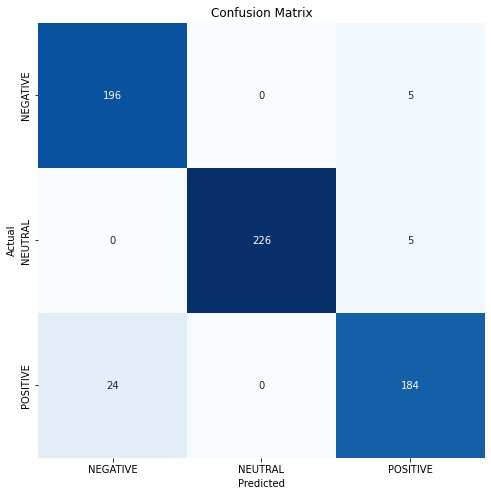

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.98      0.93       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.95      0.88      0.92       208

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

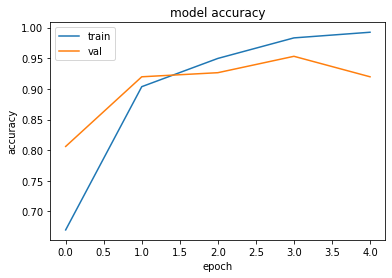

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


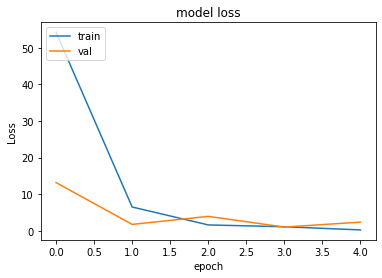

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [22]:
def plot(history, variable):
    plt.plot(range(len(history[variable])), history[variable])
    plt.title(variable)

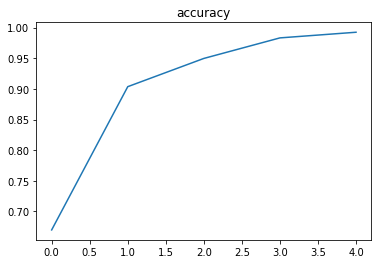

In [23]:
plot(history.history, "accuracy")


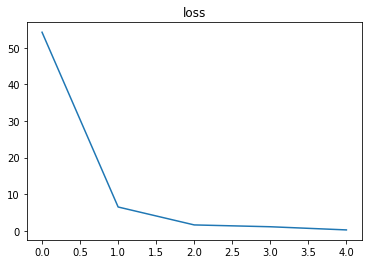

In [24]:
plot(history.history, "loss")


## SVM

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', degree=4) 
svm.fit(X_train, y_train) 


SVC(degree=4, kernel='poly')

In [26]:
svm_train = svm.score(X_train, y_train)
svm_test = svm.score(X_test, y_test)
print('Training score: ', svm_train) 
print('Testing score: ', svm_test) 



Training score:  0.34115281501340483
Testing score:  0.3140625


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 

RandomForestClassifier()

In [28]:
rf_train = rfc.score(X_train, y_train)
rf_test = rfc.score(X_test, y_test)
print('Training score: ', rf_train) 
print('Testing score: ', rf_test) 

Training score:  1.0
Testing score:  0.98125


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter=500)

In [36]:
lr.fit(X_train, y_train) 


C:\Users\lakshya\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [37]:
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)
print('Training score: ', lr_train) 
print('Testing score: ', lr_test) 

Training score:  0.3398123324396783
Testing score:  0.3140625


## Comparing Models

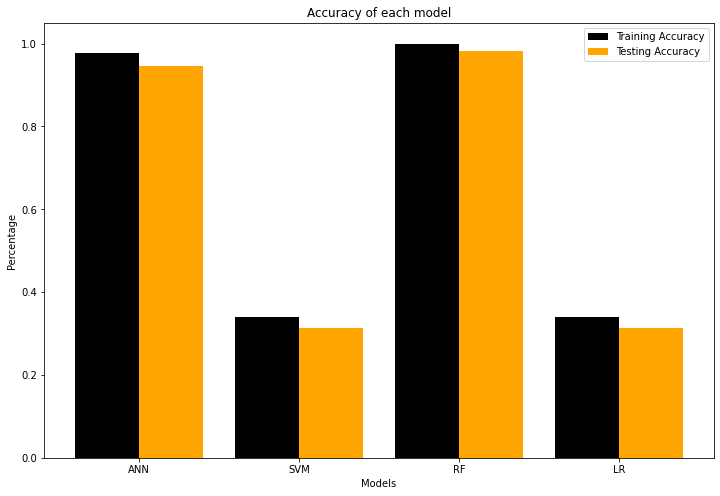

In [38]:
# Bar Plot 

plt.figure(figsize=(12,8)) 

X = ['ANN','SVM','RF', 'LR']
train_acc = [ann_train, svm_train, rf_train, lr_train] 
test_acc = [ann_test, svm_test, rf_test, lr_test] 

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train_acc, 0.4, label = 'Training Accuracy', color = 'black') 
plt.bar(X_axis + 0.2, test_acc , 0.4, label = 'Testing Accuracy', color = 'orange')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Accuracy of each model")
plt.legend()
plt.show()

## Movie Recommendation

In [52]:
from movie import movie_recomm 

### Checking for randomly chosen person (Custom Input!)

In [70]:
from random import randint 

rand_n = randint(0,X_test.shape[0]-1) 

pred_label = np.argmax(model.predict(np.array(X_test)[rand_n:rand_n +1])[0])

if pred_label == 0: 
    print('Predicted mood: Negative!')
    movie_recomm('Negative')

elif pred_label == 1: 
    print('Predicted mood: neutral!')
    movie_recomm('Neutral') 

else: 
    print('Predicted mood: positive!')
    movie_recomm('Positive') 

Predicted mood: positive!
Categories under this emotion are: Romance, Family and Fantasy
*********************************************

             Movie Name Year of Release  Watchtime Movie Rating
0         The Lost City            2022  [112 min]        [6.6]
1  The Power of the Dog            2021  [126 min]        [6.9]
2       West Side Story            2021  [156 min]        [7.3]

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Thanks for trying our recommender system!
